In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("..")
print("at directory:", os.getcwd())
sys.path.append("simulations")

at directory: /Users/wilka/git/research/human-dyna-web/figures
changing to root directory
at directory: /Users/wilka/git/research/human-dyna-web


In [6]:
import wandb
import pandas as pd
import wandb_result_plots

ntraining_envs = [8, 16, 32, 64, 128, 256, 512]
settings = [f"evaluator_performance-achievements-{n}" for n in ntraining_envs]
model_to_group = {
  "ql": "ql-final-5",
  "ql-sf": "ql-sf-final-5",
  "dyna": "dyna-final-5",
  "preplay": "preplay-final-5",
}
df = wandb_result_plots.get_metric_data_by_group(
  model_to_group=model_to_group,
  debug=False,
)
df

Models:   0%|          | 0/4 [00:00<?, ?it/s]

Loaded data/ql_ql-final-5_raw.json
Loaded data/ql-sf_ql-sf-final-5_raw.json
Loaded data/dyna_dyna-final-5_raw.json
Loaded data/preplay_preplay-final-5_raw.json


,model,setting,group,name,metric,value,run_id
0,ql,actor_performance-8,ql-final-5,num_=8,0.score,3.953498,plh6ki32
1,ql,actor_performance-achievements-8,ql-final-5,num_=8,Achievements/cast_fireball,0.000000,plh6ki32
2,ql,actor_performance-achievements-8,ql-final-5,num_=8,Achievements/cast_iceball,0.000000,plh6ki32
3,ql,actor_performance-achievements-8,ql-final-5,num_=8,Achievements/collect_coal,24.343676,plh6ki32
4,ql,actor_performance-achievements-8,ql-final-5,num_=8,Achievements/collect_diamond,0.000000,plh6ki32
...,...,...,...,...,...,...,...
18763,preplay,evaluator_performance-achievements-512,preplay-final-5,"alg=preplay,num_=512",Achievements/place_plant,99.999992,4eya9gh9
18764,preplay,evaluator_performance-achievements-512,preplay-final-5,"alg=preplay,num_=512",Achievements/place_stone,97.142845,4eya9gh9
18765,preplay,evaluator_performance-achievements-512,preplay-final-5,"alg=preplay,num_=512",Achievements/place_table,99.999992,4eya9gh9
18766,preplay,evaluator_performance-achievements-512,preplay-final-5,"alg=preplay,num_=512",Achievements/place_torch,56.060596,4eya9gh9


<Axes: title={'center': 'Generalization Performance to \n10,000 Unique Environments'}, xlabel='Number of Unique Training Environments', ylabel='% Maximum Score'>

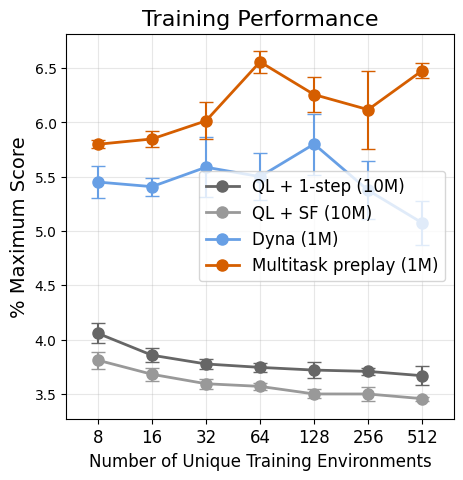

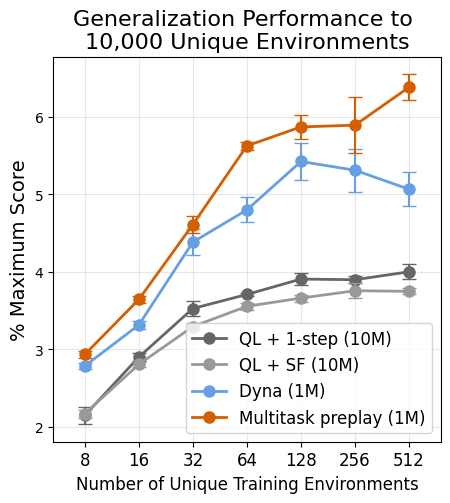

In [22]:
wandb_result_plots.plot_training_envs_score(
  df,
  ntraining_envs=[8, 16, 32, 64, 128, 256, 512],
  show_legend=True,
  evaluation=False,
)
wandb_result_plots.plot_training_envs_score(
  df,
  ntraining_envs=[8, 16, 32, 64, 128, 256, 512],
  show_legend=True,
  evaluation=True,
)

(<Figure size 1200x500 with 1 Axes>,
 <Axes: title={'center': 'Per-Achievement Generalization Success Rates given 512 Unique Training Environments'}, ylabel='Success Rate'>)

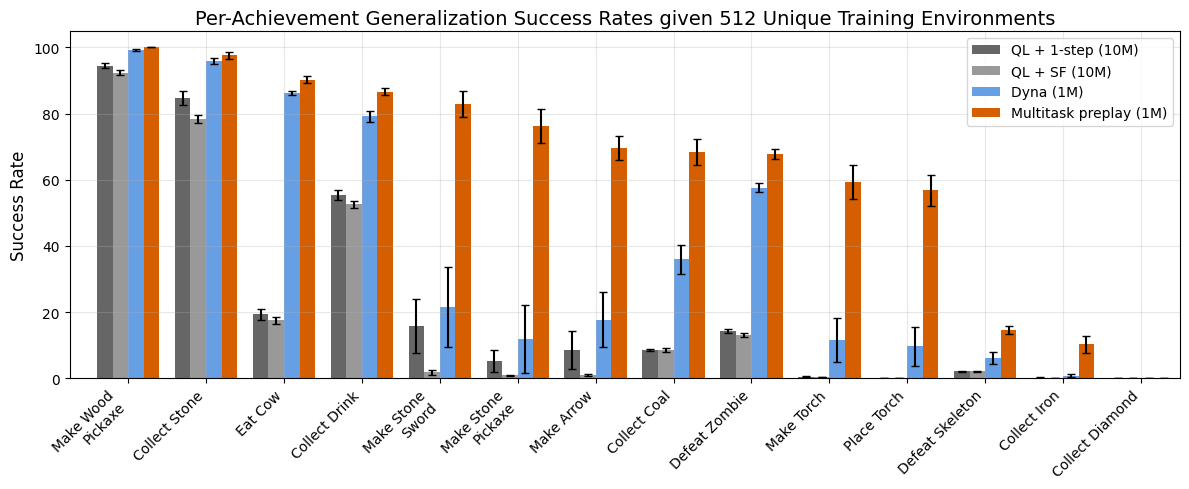

In [27]:
wandb_result_plots.plot_achievement_bars(df, n=512, figsize=(12, 5), show_legend=True)